In [107]:
import json
import requests
from collections import OrderedDict
import pandas as pd
import csv
import re
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [78]:
with open('glassdoorapi.json') as json_data_file:
    data = json.load(json_data_file)

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [79]:
host = 'http://api.glassdoor.com/api/api.htm?'
params_d = OrderedDict({
    "v": "1",
    "format": "json",
    "t.p": data['partnerID'],
    "t.k": data['key'],
    "userip": json.loads(requests.get("http://ip.jsontest.com/").text.decode('utf-8'))['ip'],
    "useragent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.81 Safari/537.36",
    "action": "jobs-stats",
    "jc": "29",
    "returnCities": "true",
    "returnJobTitles": "true"
})

jobs = {}
cities = {}

# Jobs by States
for abr, state in states.iteritems():
    params_d['l'] = state + ", United States"
    params_d['state'] = state
    content = requests.get(host,
                       params = params_d,
                       headers={
                               "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.81 Safari/537.36"
                           })
    current_jobs = content.json()['response']['jobTitles']
    for job in current_jobs:
        if job['jobTitle'] not in jobs:
            jobs[job['jobTitle']] = {}
        jobs[job['jobTitle']][state] = job['numJobs']
    current_cities = content.json()['response']['cities']
    for city in current_cities:
        name = city['name'].split(',')[0]
        cities[name] = {}
        cities[name]['count'] = city['numJobs']
        cities[name]['longitude'] = city['longitude']
        cities[name]['latitude'] = city['latitude']
        cities[name]['state'] = city['stateName']
        


In [80]:
print jobs
print cities

{u'Software Development Engineer In Test': {'Idaho': 5, 'Oregon': 16, 'Minnesota': 17}, u'C++ Developer': {'New Jersey': 20, 'Nebraska': 9, 'Wisconsin': 10, 'New York': 61, 'Illinois': 32}, u'IT Help Desk Technician': {'Hawaii': 3}, u'QlikView Developer': {'Delaware': 5}, u'Senior Team Lead Softlines': {'Oklahoma': 5}, u'Systems Engineer Asc': {'Alabama': 11, 'New Mexico': 9, 'Colorado': 27, 'Rhode Island': 5}, u'Full Stack Developer': {'Georgia': 21, 'North Dakota': 73, 'New Jersey': 31, 'Utah': 16, 'Arizona': 14, 'Florida': 25, 'Virginia': 51, 'Minnesota': 175, 'New York': 45, 'Colorado': 17}, u'Entry Level Sales': {'North Dakota': 1}, u'Senior Consultant (Technical Architect)': {'Alaska': 1}, u'Vice President Software Development': {'Maine': 4}, u'Principal Java Developer': {'New Hampshire': 6}, u'Senior S/W Engineer, Onsite Development Operations Tech Le': {'Minnesota': 24}, u'Web Applications Developer': {'Michigan': 16, 'Alaska': 2, 'North Carolina': 21, 'Rhode Island': 13, 'Conn

In [81]:
df = pd.DataFrame(data=jobs)
df.index.rename("State", inplace=True)
df.fillna(value=0, inplace=True)
df.head()

,(New-Grad) Systems Engineer,.NET Developer,.NET Engineer,.NET Software Engineer,.NET Web Developer,12B Combat Engineer,13D Field Artillery Tactical Data Systems Specialist,25N - Nodal Network Systems Operator-Maintainer,25P Microwave Systems Operator Maintainer,25Q Multi-channel Transmissions Systems Operator Maintainer,...,Windows Systems Administrator,Windows Systems Administrator II,Wings Team,Wireless Team Lead,Work From Home,Workstation Support Specialist,Z/OS Systems Programmer,oracle dba,site it leader,sr Architect
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,17.0,0.0,0.0,0.0,0.0,19.0,24.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arkansas,0.0,5.0,0.0,0.0,0.0,0.0,20.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
California,0.0,129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df.columns.values

array([u'(New-Grad) Systems Engineer', u'.NET Developer', u'.NET Engineer',
       u'.NET Software Engineer', u'.NET Web Developer',
       u'12B Combat Engineer',
       u'13D Field Artillery Tactical Data Systems Specialist',
       u'25N - Nodal Network Systems Operator-Maintainer',
       u'25P Microwave Systems Operator Maintainer',
       u'25Q Multi-channel Transmissions Systems Operator Maintainer',
       u'25S - Satellite Communications Systems Operator/Maintainer',
       u'25U - Signal Support Systems Specialist',
       u'ASP.NET, HTML5 Web Development', u'Active Directory Engineer',
       u'Agency Development Manager', u'Algorithm Engineer',
       u'Analyst - IT Quality Assurance (Tester)', u'Android Developer',
       u'App Developer', u'Apple Expert', u'Apple Masters Mobility',
       u'Applications Designer Senior Professional',
       u'Applications Developer', u'Applications Developer III',
       u'Applications Development Advisor',
       u'Applications Developme

In [83]:
job_names = df.columns.values.tolist()

data = pd.DataFrame()

groups = []
names = [
    (".Net", "\.net"),
    ("C++", "c\+\+"),
    ("C#", "c\#"),
    ("Javascript", "javascript"),
    ("Java ", "java "),
    ("Android", "android"),
    ("Security", "security"),
    ("Full Stack", "full stack"),
    ("Front End", "front end"),
    ("Devops", "devops"),
    ("Web Developer", "web"),
    ("Architect", "architect"),
    ("Data", "data"),
    ("Applications", "applications|(app )"),
    ("Programmer Analyst", "programmer analyst"),
    ("Network", "network"),
    ("Mobile", "mobile"),
    ("IT", "(it|(information (technology|systems)))"),
    ("Software Engineer", "software (engineer|developer|development)"),
    ("Systems Engineer", "systems engineer"),
    ("QA", "test|(quality assurance|qa)"),
    ("Intern", "Intern"),
    ("Entry Level", "(new grad)|(entry level)"),
    ("Associate", "associate"),
    ("Mid Level", "mid level"),
    ("Senior", "senior"),
    ("Principal", "principal"),
    ("Staff", "staff"),
    ("Lead", "lead"),
    ("Director", "director"),
]

for name in names:
    columns = [j for j in job_names if re.search(name[1], j, flags=re.IGNORECASE) is not None]
    groups.append((name[0], columns))



for group in groups:
    data[group[0]] = df[group[1]].sum(axis=1)

data

,.Net,C++,C#,Javascript,Java,Android,Security,Full Stack,Front End,Devops,...,QA,Intern,Entry Level,Associate,Mid Level,Senior,Principal,Staff,Lead,Director
State,,,,,,,,,,,,,,,,,,,,,
Alabama,17.0,13.0,0.0,0.0,19.0,0.0,37.0,0.0,0.0,0.0,...,22.0,20.0,0.0,15.0,0.0,96.0,0.0,0.0,8.0,43.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,12.0,1.0
Arizona,33.0,0.0,0.0,0.0,107.0,0.0,30.0,14.0,14.0,25.0,...,33.0,30.0,0.0,0.0,0.0,173.0,18.0,0.0,13.0,83.0
Arkansas,5.0,0.0,0.0,0.0,30.0,0.0,5.0,0.0,0.0,8.0,...,13.0,0.0,5.0,9.0,0.0,36.0,0.0,0.0,8.0,19.0
California,129.0,0.0,0.0,0.0,296.0,0.0,92.0,302.0,369.0,633.0,...,297.0,191.0,0.0,0.0,0.0,2406.0,372.0,286.0,123.0,217.0
Colorado,33.0,0.0,0.0,0.0,117.0,0.0,49.0,17.0,0.0,76.0,...,103.0,119.0,0.0,0.0,0.0,324.0,41.0,0.0,0.0,0.0
Connecticut,46.0,18.0,0.0,20.0,55.0,0.0,0.0,0.0,0.0,17.0,...,0.0,9.0,0.0,10.0,0.0,65.0,0.0,0.0,19.0,9.0
Delaware,13.0,0.0,0.0,0.0,66.0,0.0,5.0,5.0,0.0,7.0,...,18.0,4.0,0.0,5.0,0.0,48.0,0.0,0.0,28.0,11.0
District of Columbia,45.0,0.0,0.0,0.0,137.0,0.0,111.0,0.0,15.0,24.0,...,14.0,0.0,0.0,0.0,0.0,398.0,22.0,0.0,0.0,0.0


In [84]:
df2 = pd.DataFrame(data=cities)
df2 = df2.T
df2.reset_index(inplace=True)
df2.columns.values[0] = "Cities"
df2['count'] = df2['count'].fillna(value=0)
df2.head()

,Cities,count,latitude,longitude,state
0,A Country Place,3,38.955,-77.2764,Virginia
1,A Sherton,10,28.4417,-99.76,Texas
2,Abbeville,17,29.9744,-92.1342,Louisiana
3,Abbotsford,2,44.9464,-90.3158,Wisconsin
4,Abbott Park,15,0,0,Illinois


In [88]:
df2.to_csv("glassdoor_cities.csv", encoding="utf-8", index=False)
data.to_csv("glassdoor_states.csv")

In [ ]:
cities_data = pd.DataFrame()
states = pd.DataFrame()

cities_data = pd.read_csv("glassdoor_cities.csv", encoding="utf-8")

states_data = pd.read_csv("glassdoor_states.csv")

cities_data['FIPS'] = pd.Series(np.random.randn(len(cities_data.index)), index=cities_data.index)
host = "http://data.fcc.gov/api/block/find"

for i in range(0, len(cities_data.index)):
    params = {
        'longitude': cities_data.iloc[i][['longitude']],
        'latitude': cities_data.iloc[i][['latitude']],
        'format': "json"
    }
    content = requests.get(host,
                       params = params,
                       headers={
                               "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.81 Safari/537.36"
                           })
    cities_data.iloc[i]['FIPS'] = content.json()["County"]["FIPS"]

cities_data.head()

In [ ]:
df2.to_csv("glassdoor_cities.csv", encoding="utf-8", index=False)

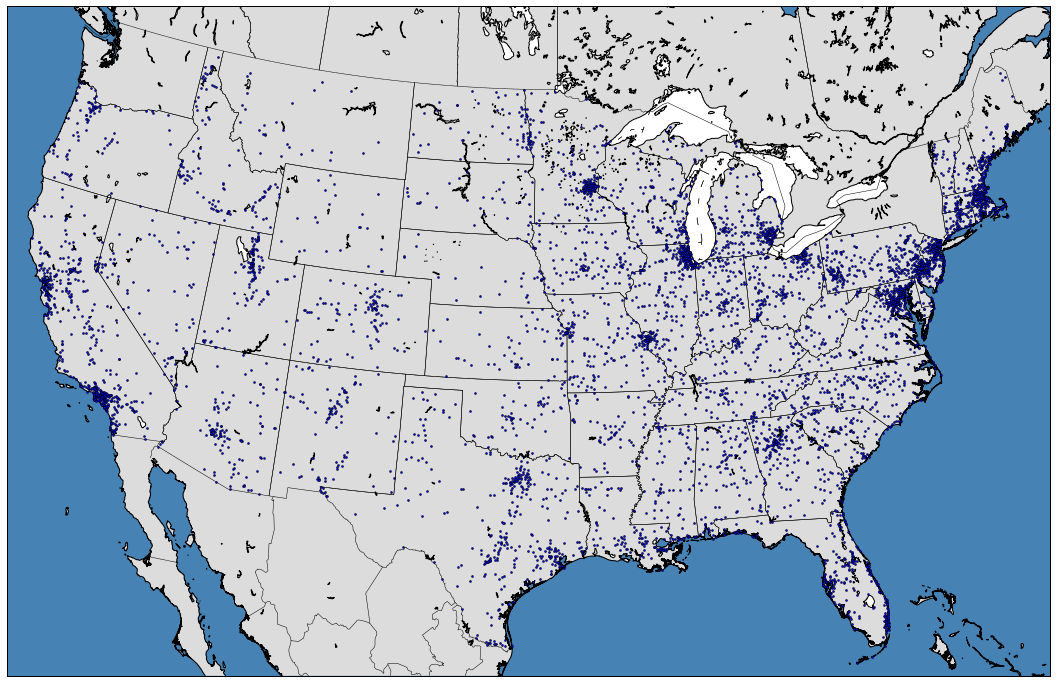

In [99]:
 %matplotlib inline

entry_level = cities
    
fig = plt.figure(figsize=(24, 12))

themap = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49, projection='lcc',lat_1=32,lat_2=45,lon_0=-95, resolution='f')
themap.drawcoastlines()
themap.drawcountries()
themap.drawstates()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

x, y = themap(cities_data[['longitude']].values, cities_data[['latitude']].values)
      
themap.plot(x, y, 
            'o',
            color='Blue',
            markersize=2
            )

plt.show()
